In [1]:
import json
import networkx as nx

# Step 1: Load the JSON File
with open('../dependency_graph.json', 'r') as f:
    graph_data = json.load(f)

# Step 2: Parse Nodes and Edges
nodes = graph_data['nodes']
edges = [(edge['source'], edge['target']) for edge in graph_data['edges']]

# Step 3: Analyze the Graph
# Initialize a graph object
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Basic Analysis
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 248
Number of edges: 357


In [2]:
# Advanced Analysis

# Print the node with the highest in-degree
in_degree_centrality = nx.in_degree_centrality(G)
node_max_in_degree = max(in_degree_centrality, key=in_degree_centrality.get)
print(f"Node with highest in-degree:\n{node_max_in_degree}")


Node with highest in-degree:
name=getFile
file=wwpdb/apps/deposit/depui/common_functions.py
line=117


In [3]:

# Print the node with the highest out-degree
out_degree_centrality = nx.out_degree_centrality(G)
node_max_out_degree = max(out_degree_centrality, key=out_degree_centrality.get)
print(f"Node with highest out-degree:\n{node_max_out_degree}")

Node with highest out-degree:
name=process_files
file=wwpdb/apps/deposit/depui/upload.py
line=1795


In [4]:
# Identify nodes having only one outgoing edge
nodes_with_one_outgoing_edge = [node for node in G.nodes if G.out_degree(node) == 1]
print(f"Nodes with only one outgoing edge: {json.dumps(nodes_with_one_outgoing_edge, indent=2)}")


Nodes with only one outgoing edge: [
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=get_em_map_upload_index\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=10416",
  "name=__init__\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=646",
  "name=__init__\nfile=wwpdb/apps/wf_engine/engine/dbAPI.py\nline=13",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=40",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=selectRows\nfile=wwpdb/utils/wf/dbapi/DbCommand.py

In [5]:

# Identify nodes having only one incoming edge
nodes_with_one_incoming_edge = [node for node in G.nodes if G.in_degree(node) == 1]
print(f"Nodes with only one incoming edge: {json.dumps(nodes_with_one_incoming_edge, indent=2)}")


Nodes with only one incoming edge: [
  "name=get_em_map_partition_number\nfile=wwpdb/apps/deposit/depui/upload.py\nline=3038",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=__map_sorter\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1809",
  "name=getFileTypeMatch\nfile=wwpdb/apps/deposit/depui/FileConversion.py\nline=584",
  "name=update_em_parameters\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1617",
  "name=run_format_model_check_wf\nfile=wwpdb/apps/deposit/depui/upload.py\nline=272",
  "name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324",
  "name=do_file_action\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1700",
  "name=check_em_conversion\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1739",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=clearUIlock\nfile=wwpdb/apps/deposit/depui/hi

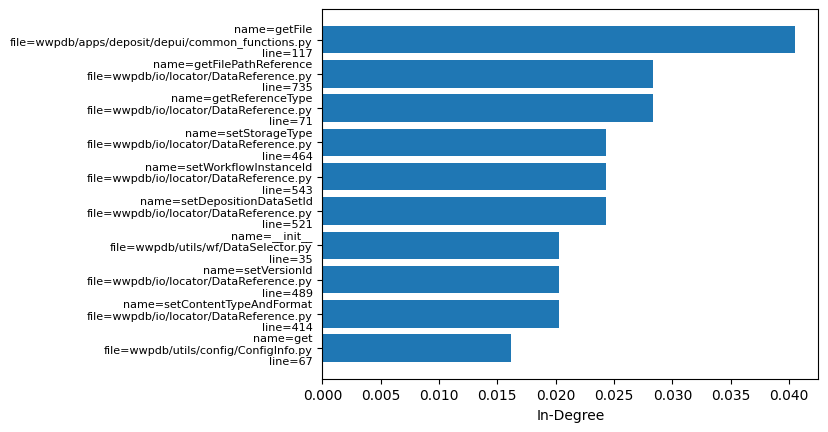

In [6]:
# Plot a horizontal bar chart of the in-degree distribution of the top 10 nodes
import matplotlib.pyplot as plt
import numpy as np

# Sort the nodes based on in-degree
sorted_nodes_by_in_degree = {node: in_degree_centrality[node] for node in sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)}

# Get the top 10 nodes
top_10_nodes_by_in_degree = list(sorted_nodes_by_in_degree.keys())[:10]
top_10_nodes_in_degree = [sorted_nodes_by_in_degree[node] for node in top_10_nodes_by_in_degree]

# Plot the horizontal bar chart
fig, ax = plt.subplots()
y_pos = np.arange(len(top_10_nodes_by_in_degree))
ax.barh(y_pos, top_10_nodes_in_degree, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_nodes_by_in_degree, fontsize=8)  # Decrease font size here
ax.invert_yaxis()
ax.set_xlabel('In-Degree')

plt.show()

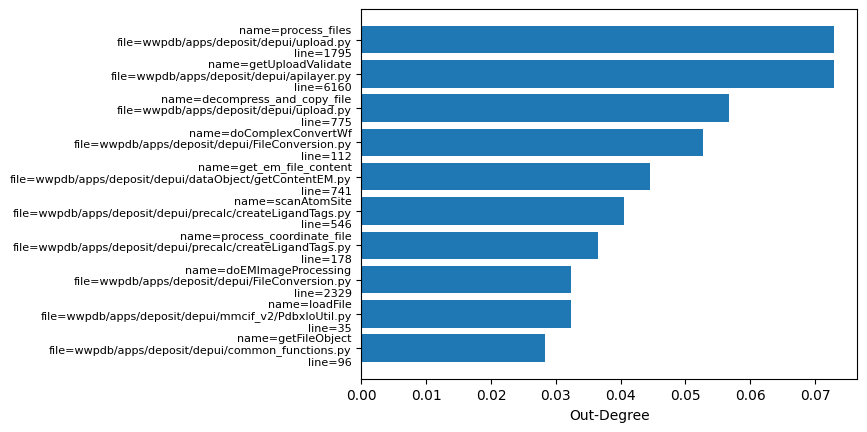

In [7]:
# Plot a horizontal bar chart of the out-degree distribution of the top 10 nodes
import matplotlib.pyplot as plt
import numpy as np

# Sort the nodes based on out-degree
sorted_nodes_by_out_degree = {node: out_degree_centrality[node] for node in sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)}

# Get the top 10 nodes
top_10_nodes_by_out_degree = list(sorted_nodes_by_out_degree.keys())[:10]
top_10_nodes_out_degree = [sorted_nodes_by_out_degree[node] for node in top_10_nodes_by_out_degree]

# Plot the horizontal bar chart
fig, ax = plt.subplots()
y_pos = np.arange(len(top_10_nodes_by_out_degree))
ax.barh(y_pos, top_10_nodes_out_degree, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_nodes_by_out_degree, fontsize=8)  # Adjust font size as needed
ax.invert_yaxis()
ax.set_xlabel('Out-Degree')

plt.show()

In [8]:

# Identify nodes having only one incoming and one outgoing edge
nodes_with_one_incoming_and_outgoing_edge = [node for node in G.nodes if G.in_degree(node) == 1 and G.out_degree(node) == 1]
print(f"Nodes with only one incoming and one outgoing edge: {json.dumps(nodes_with_one_incoming_and_outgoing_edge, indent=2)}")

Nodes with only one incoming and one outgoing edge: [
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34",
  "name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334",
  "name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667",
  "name=__init__\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=646",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=selectRows\nfile=wwpdb/utils/wf/dbapi/DbCommand.py\nline=255",
  "name=exist\nfile=wwpdb/utils/wf/dbapi/WfDbApi.py\nline=593",
  "name=__init__\nfile=wwpdb/utils/wf/DataValueContainer.py\nline=34",
  "name=path\nfile=wwpdb/apps/deposit/depui/models.py\nline=199",
  "name=chec

In [9]:
# Given that the graph represents a call stack, identify non-branched paths of deep nested calls
# A non-branched path is a path where each node has only one incoming and one outgoing edge
# Initialize a list to hold all non-branched paths
non_branched_paths = []

# Iterate over nodes with only one outgoing edge to start paths
for start_node in nodes_with_one_outgoing_edge:
    current_path = [start_node]
    current_node = start_node
    
    # Traverse the graph following the non-branched path
    while True:
        # Find the next node if the current node has exactly one outgoing edge and is not an end node
        if current_node in nodes_with_one_incoming_and_outgoing_edge:
            next_node = next(iter(G.successors(current_node)), None)
            if next_node and next_node not in current_path:  # Avoid loops
                current_path.append(next_node)
                current_node = next_node
            else:
                break  # End the path if no next node or loop detected
        else:
            break  # End the path if current node does not meet the criteria
    
    # Save the path if it has more than one node
    if len(current_path) > 1:
        non_branched_paths.append(current_path)

# Print the identified non-branched paths
for i, path in enumerate(non_branched_paths, 1):
    print(f"Path {i}: {path}")

Path 1: ['name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598', 'name=createTimeStamp\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=644']
Path 2: ['name=add_status\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1324', 'name=addStatus\nfile=wwpdb/apps/deposit/depui/status.py\nline=240']
Path 3: ['name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860', 'name=getDataType\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=3491']
Path 4: ['name=__init__\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=34', 'name=__init__\nfile=wwpdb/apps/deposit/depui/PickleUtil.py\nline=45']
Path 5: ['name=calculate_centre_of_mass_for_xray\nfile=wwpdb/apps/deposit/depui/upload.py\nline=334', 'name=getDataType\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=3491']
Path 6: ['name=do_file_merge\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1667', 'name=ss_create_long_event\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1330', 'n

In [10]:
# Identify the nodes whose "name" attribute is in camel case

# First, define a function to extract the name attribute from a node
import re

def extract_node_attributes(node_string):
    """Extract the name, file, and line attributes from the node string."""
    pattern = r'name=([^\n]+)\nfile=([^\n]+)\nline=(\d+)'
    match = re.search(pattern, node_string)
    if match:
        # Return the matched name, file path, and line number as a tuple
        return match.group(1), match.group(2), match.group(3)
    return None, None, None  # Return None for each attribute if not found

# Define a function that checks whether there is any character in uppercase in the string
def has_uppercase(string):
    """Check if a string has any uppercase character."""
    return any(char.isupper() for char in string)

# Then, define a function to check if a string is in camel case
def is_camel_case(string):
    """Check if a string is in camel case."""
    return bool(re.match(r'^[a-z]+(?:[A-Z][a-z]*)+$', string))

# Finally, identify the nodes whose "name" attribute is in camel case
camel_case_nodes = [node for node in nodes if is_camel_case(extract_node_attributes(node)[0]) or has_uppercase(extract_node_attributes(node)[0])]
# camel_case_nodes = [
#     "name=__addMilestoneVariants\nfile=/path/to/file.py\nline=23",
#     "name=getConfigDictionary\nfile=/path/to/another_file.py\nline=45"
# ]
print(f"Nodes with 'name' attribute in camel case: {json.dumps(camel_case_nodes, indent=2)}")
print(f"Number of nodes with 'name' attribute in camel case: {len(camel_case_nodes)}")

# Suggest snake case names for the nodes with camel case names
def suggest_snake_case_name(camel_case_name):
    """Suggest a snake case name from a camel case name, handling leading underscores, acronyms, and numbers."""
    # Preserve leading underscores
    leading_underscores = ''.join(re.match(r'^_+', camel_case_name)[0] if re.match(r'^_+', camel_case_name) else '')
    # Remove leading underscores for processing
    camel_case_name = re.sub(r'^_+', '', camel_case_name)
    
    # Insert underscores before uppercase letters followed by lowercase letters or preceded by lowercase letters or numbers
    snake_case_name = re.sub(r'(?<=[a-z0-9])([A-Z])|(?<=[A-Z])([A-Z][a-z])', r'_\1\2', camel_case_name)
    
    return leading_underscores + snake_case_name.lower()

# Suggest snake case names for the nodes with camel case names
suggested_names = []
for node in camel_case_nodes:
    name, file, line = extract_node_attributes(node)
    if name is not None:  # Check if name is not None
        suggested_names.append({
            "file": file,
            "line": line,
            "original_name": name,
            "suggested_name": suggest_snake_case_name(name)
        })

print(f"Suggested snake case names: {json.dumps(suggested_names, indent=2)}")
print(f"Number of nodes with camel case names: {len(camel_case_nodes)}")

Nodes with 'name' attribute in camel case: [
  "name=writeMileStone\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=160",
  "name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598",
  "name=getFileTypeMatch\nfile=wwpdb/apps/deposit/depui/FileConversion.py\nline=584",
  "name=isNmrLegacyDeposition\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=9860",
  "name=clearUIlock\nfile=wwpdb/apps/deposit/depui/hiddenData/setHidden.py\nline=237",
  "name=fetchItemValue\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=8814",
  "name=__addMilestoneVariants\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=743",
  "name=getConfigDictionary\nfile=wwpdb/utils/config/ConfigInfoData.py\nline=740",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=525",
  "name=getExperiments\nfile=wwpdb/apps/deposit/depui/snapshot/Experiments.py\nline=45",
  "name=getObject\nfile=wwpdb/utils/wf/dbapi/WfDbApi.py\nline=220",
  "name=checkId\nfile=wwpdb/utils/wf/db

In [11]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/upload.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/upload.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/upload.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/upload.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/upload.py': []
Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/upload.py': 0


In [12]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/dataObject/getContentEM.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/dataObject/getContentEM.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': []
Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/dataObject/getContentEM.py': 0


In [13]:
# Filter only the suggested names from "wwpdb/apps/deposit/depui/apilayer.py"
filtered_suggested_names = [suggestion for suggestion in suggested_names if suggestion["file"] == "wwpdb/apps/deposit/depui/apilayer.py"]
print(f"Suggested snake case names in 'wwpdb/apps/deposit/depui/apilayer.py': {json.dumps(filtered_suggested_names, indent=2)}")
print(f"Number of nodes with camel case names in 'wwpdb/apps/deposit/depui/apilayer.py': {len(filtered_suggested_names)}")

Suggested snake case names in 'wwpdb/apps/deposit/depui/apilayer.py': [
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "9860",
    "original_name": "isNmrLegacyDeposition",
    "suggested_name": "is_nmr_legacy_deposition"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "8814",
    "original_name": "fetchItemValue",
    "suggested_name": "fetch_item_value"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "525",
    "original_name": "getExperiments",
    "suggested_name": "get_experiments"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "3491",
    "original_name": "getDataType",
    "suggested_name": "get_data_type"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "7614",
    "original_name": "getCategoryItems",
    "suggested_name": "get_category_items"
  },
  {
    "file": "wwpdb/apps/deposit/depui/apilayer.py",
    "line": "6160",
    "original_name": "getUploadValid

In [15]:
# Find cycles in the graph
cycles = list(nx.simple_cycles(G))
print("Cycles found:", cycles[:5])  # Print a sample of found cycles

Cycles found: []


In [18]:
# Strongly connected components
strongly_connected_components = list(nx.strongly_connected_components(G))
print("Strongly Connected Components:", strongly_connected_components[:5])

# Weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))
print("Weakly Connected Components:", weakly_connected_components[:5])

Strongly Connected Components: [{'name=getReferenceType\nfile=wwpdb/io/locator/DataReference.py\nline=71'}, {'name=get\nfile=wwpdb/utils/config/ConfigInfo.py\nline=67'}, {'name=__getInternalPath\nfile=wwpdb/io/locator/DataReference.py\nline=870'}, {'name=getPartitionNumberSearchTarget\nfile=wwpdb/io/locator/DataReference.py\nline=1181'}, {'name=__getInternalPartitionNumber\nfile=wwpdb/io/locator/DataReference.py\nline=1249'}]
Weakly Connected Components: [{'name=get_system_file_type\nfile=wwpdb/apps/deposit/depui/upload.py\nline=455', 'name=runInsert\nfile=wwpdb/apps/wf_engine/engine/dbAPI.py\nline=151', 'name=getSetInstanceCount\nfile=wwpdb/apps/deposit/depui/mmcif_v2/PdbxCategoryItemSetInstReader.py\nline=170', 'name=check_all_tls_categories\nfile=wwpdb/apps/deposit/depui/precalc/createLigandTags.py\nline=450', 'name=makeSqlConstraint\nfile=wwpdb/utils/wf/dbapi/DbCommand.py\nline=104', 'name=getDataType\nfile=wwpdb/apps/deposit/depui/apilayer.py\nline=3491', 'name=lookup_report_name\

In [19]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", dict(list(betweenness_centrality.items())[:5]))

Betweenness Centrality: {'name=process_files\nfile=wwpdb/apps/deposit/depui/upload.py\nline=1795': 0.0, 'name=writeMileStone\nfile=wwpdb/apps/deposit/depui/common_functions.py\nline=160': 0.00042985826041025014, 'name=get_em_map_partition_number\nfile=wwpdb/apps/deposit/depui/upload.py\nline=3038': 3.291530891017412e-05, 'name=basename\nfile=wwpdb/apps/deposit/depui/models.py\nline=195': 0.0, 'name=createFileEvent\nfile=wwpdb/apps/deposit/depui/snapshot/Snapshot.py\nline=598': 0.00020023479587022588}
